# Risk Parameter Analysis

> Generate the `pnl.csv` and `pnl_single.csv` files from [tests/risk-params/RiskParamAnalysis.t.sol](../tests/risk-params/RiskParamAnalysis.t.sol).

## Risk Param vs PnL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Overview of all parameters

Results of changing only one parameter at a time.

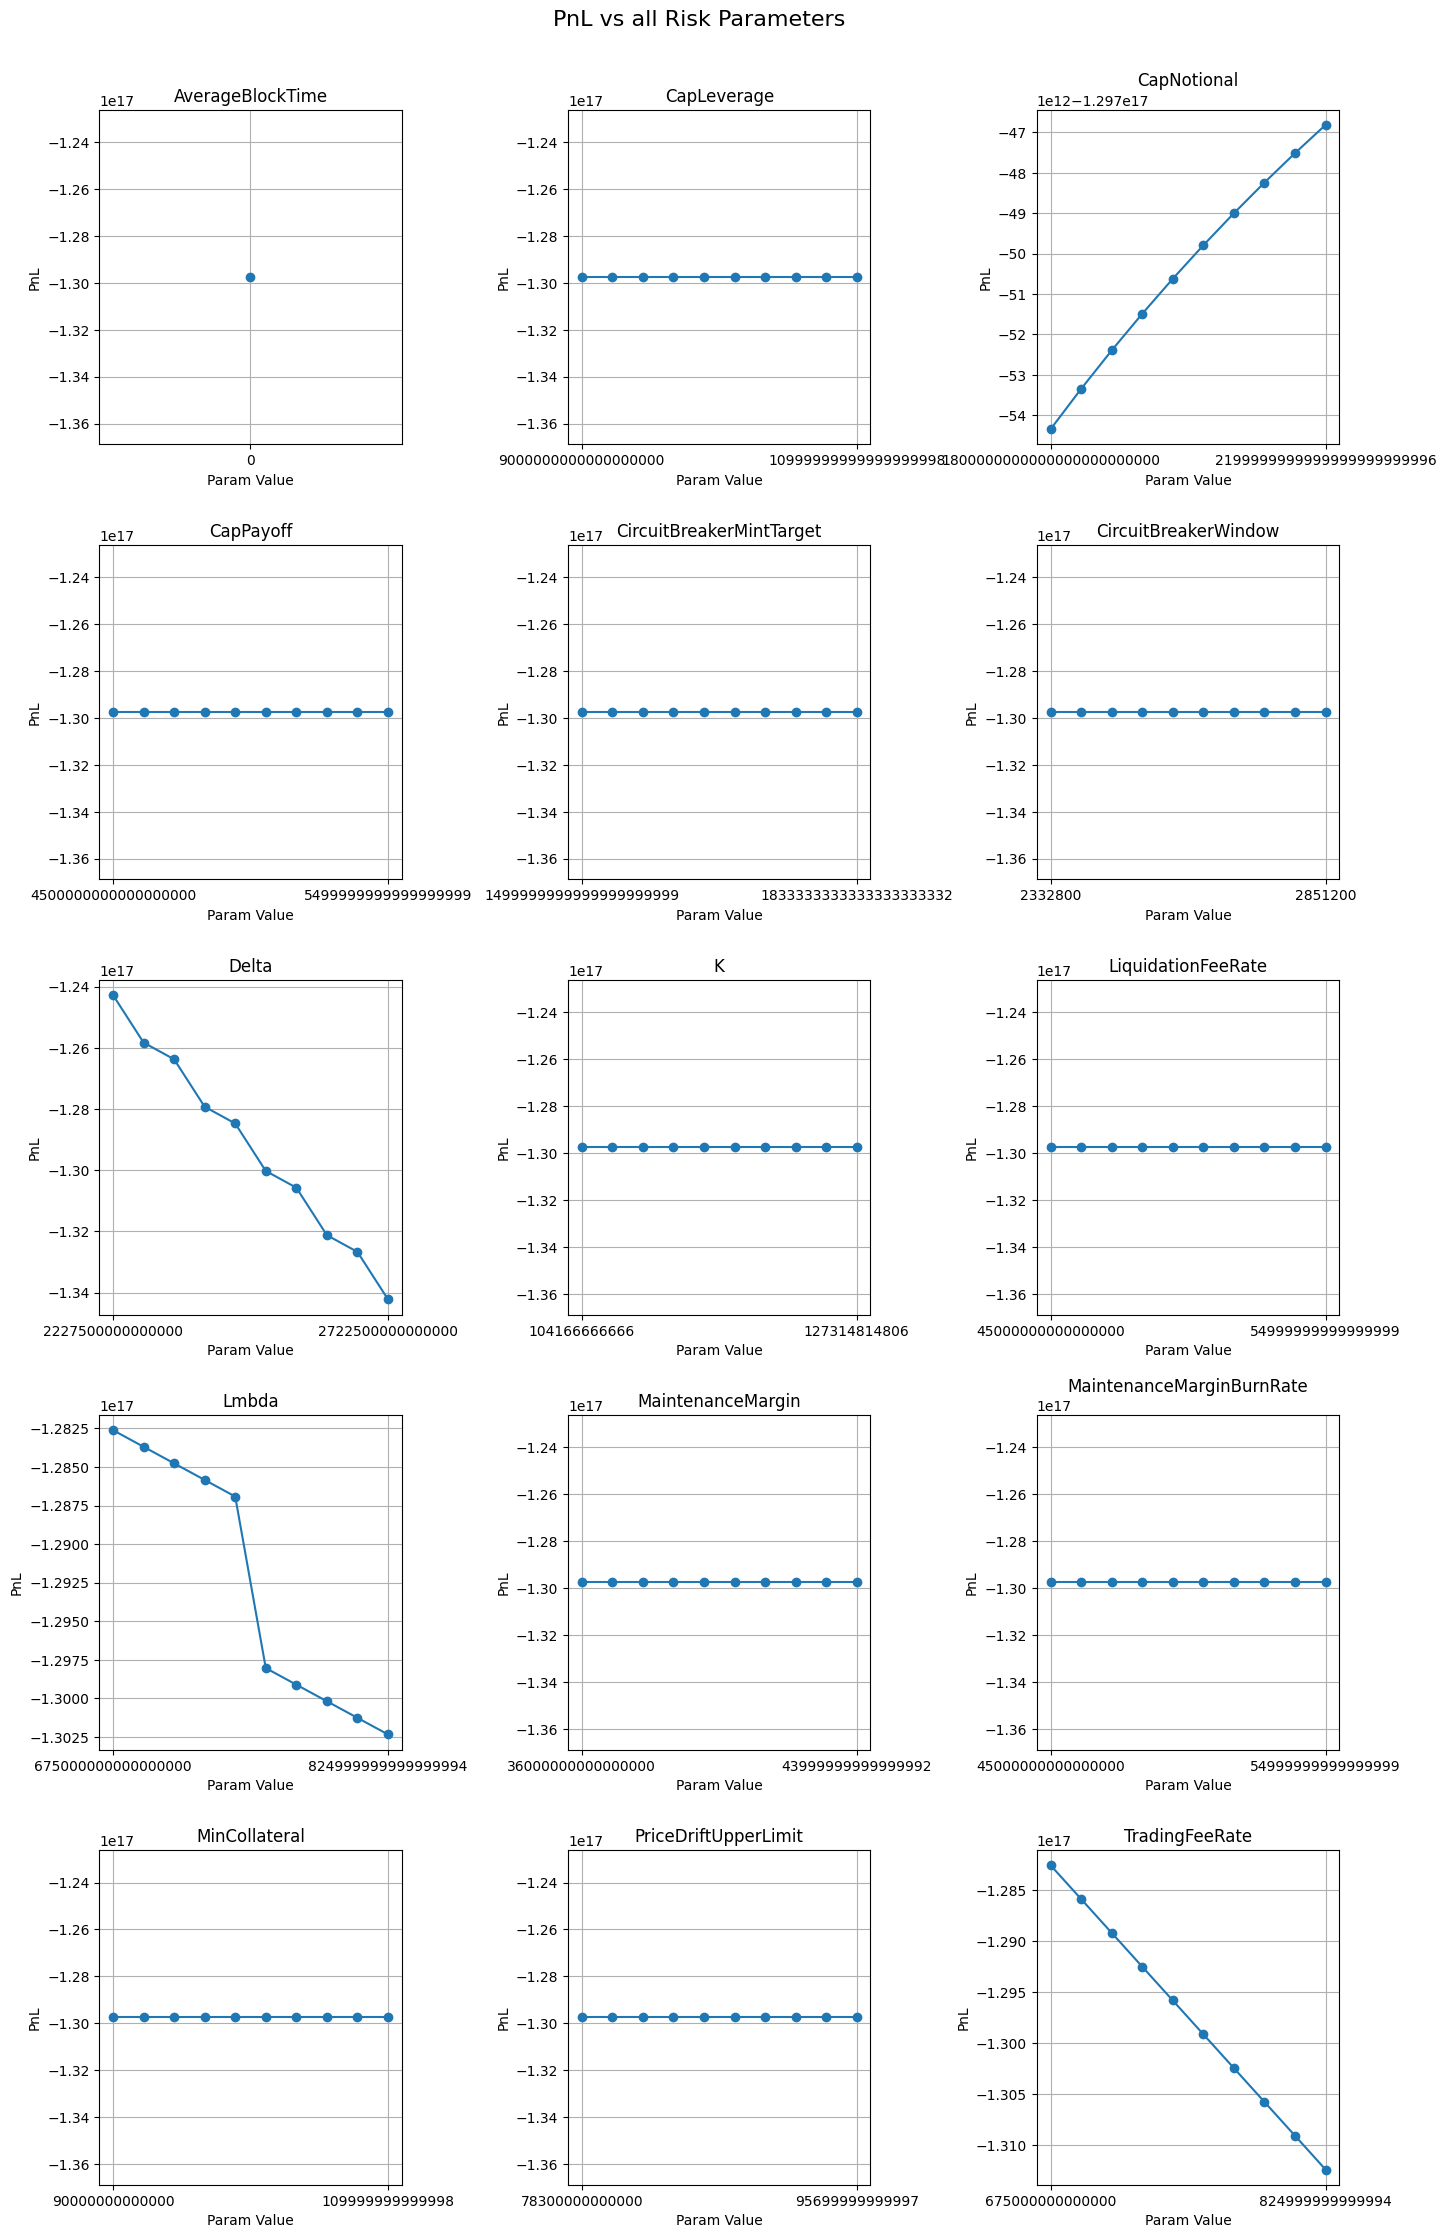

In [10]:
# Load CSV into a DataFrame
df = pd.read_csv("../pnl.csv", delimiter=";")

# Group by param_name
grouped = df.groupby("param_name")

# Determine the number of rows and columns for subplots
num_plots = len(grouped)
num_cols = 3  # Adjust the number of columns as needed
num_rows = -(-num_plots // num_cols)  # Ceiling division to get the number of rows

# Plotting
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 5*num_rows))  # Adjust figsize as needed
axs = axs.flatten()  # Flatten the array of subplots for easier iteration

for i, (name, group) in enumerate(grouped):
    row = i // num_cols
    col = i % num_cols
    axs[i].plot(group["param_value"], group["pnl"], marker="o")
    axs[i].set_title(name)
    axs[i].set_xlabel("Param Value")
    axs[i].set_ylabel("PnL")
    axs[i].grid(True)

    # Show only 2 ticks on the x-axis
    xticks = axs[i].get_xticks()
    if len(xticks) > 2:
        axs[i].set_xticks([xticks[0], xticks[-1]])

# Hide empty subplots
for i in range(num_plots, len(axs)):
    axs[i].axis("off")

# Title for the entire image
fig.suptitle("PnL vs all Risk Parameters", fontsize=16)

# Adjust layout
plt.subplots_adjust(top=0.94, hspace=0.3, wspace=0.55)  # Adjust top and hspace as needed

### Analysis of one parameter

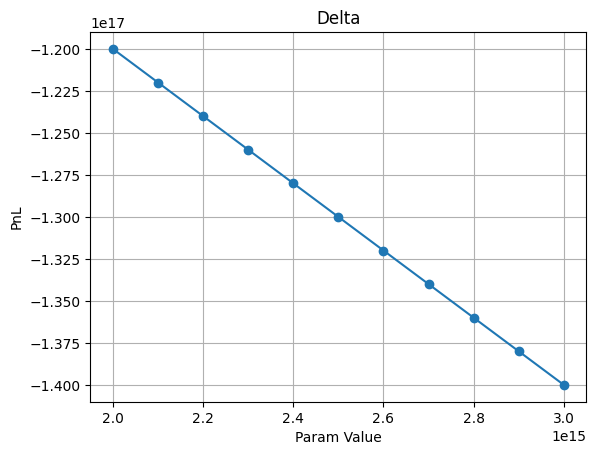

In [9]:
df = pd.read_csv("../pnl_single.csv", delimiter=";")

param_name = df["param_name"].iloc[0]
x = df["param_value"]
y = df["pnl"]

plt.plot(x, y, marker="o")
plt.title(param_name)
plt.xlabel("Param Value")
plt.ylabel("PnL")
plt.grid(True)